# Zadanie 1

## Przygotowywania do zadania 

### Wczytywanie potrzebnych bibliotek

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

### Ustawianie globalnych danych

Ustawiam tutaj, dane które są uniwersalne dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [2]:
np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 500

## Badanie 

### Potrzebne funkcje 

Tutaj stworzę wszystkie funkcje, które wykorzystam do badania, przy okazji opisując od razu ich działanie. Następnie przy symulacji badania, będą one tylko wywoływane. Funkcje zaczynają się od najbardziej ogólnej i idą w dół razem z programem(idziemy po kolei tak samo jak program).

#### Funkcja obliczania mocy testu 

Najogólniejsza funkcja, która przygotuje dane, które wykorzystam, aby zrobić symulacje w funkcji symulacja. Więc ustalamy liczbę danych oraz stopień swobody i idziemy dalej przekazując parametry dalej do funkcji. Po symulacji dodajemy wynik do tablicy i idziemy dalej.

Argumenty: 
- test - Mówi który test jest symulowany

Funkcja będzie zwracać tablice 2D(i,j), która zbierała dane dla i-tej liczbie danych oraz j-tych stopni swobody.



In [3]:
def obliczanie_mocy_testu(test):
    # Tablica, która zbierze mi moce testów, które zwróci
    moce_testow = []

    # Dla każdej liczby z liczby_danych
    for l_danych in liczby_danych:
        """
        Tworzę nową tablicę która przechowuję wyniki mocu testu dla i-tej liczby danych. Lista przechowuje wyniki dla każdego j-stopnia
        swoobody w stopnie_swobody. Wykorzystuje List Comprahension, żeby umilic kod
        """
        moce_testow.append([symulacja(l_danych,s_stopien,test) for s_stopien in stopnie_swobody])

    # Zwracam w.w tablice
    return moce_testow

#### Funkcja symulacji 

Ustaliliśmy już liczbę danych oraz liczbe stopni swobody dla naszych danych. 
W tej funkcji będziemy generować dane z rozkładu t-studenta dokładnie z tymi parametrami, przekazanymi jako argumenty. 
Następnie prześlemy je do funkcji, która wybierze, który test jest obecnie symulowany i wynik tej funkcji będziemy sumować w zmiennej 
suma_odrzucen_H0.

Argumenty:
- l_danych - Ile danych będziemy losować z rozkładu t-studenta 
- s_stopien - Liczba stopni swobody dla rozkładu t-studenta
- test - Jaki test jest obecnie symulowany

Funkcja będzie zwracać odsetek w jakim odrzuciłem hipotezę zerową dla podanych parametrów

In [4]:
def symulacja(l_danych,s_stopien,test):
    # W tej zmiennej będę sumował ile razy odrzuciłem hipotezę zerową dla danego zestawu 
    suma_odrzucenia_H0 = 0

    # Tutaj będzie symulacja
    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu t-Studenta o l_danych wielkości oraz s_stopien stopni swobody
        probka = stats.t.rvs(s_stopien,size=l_danych)

        # Następnie standaryzuje dane 
        stand_probka = (probka-np.mean(probka))/np.std(probka)

        # Następnie przekazuje wszystkie dane, aby wybrac który test jest symulowany i dowiedzieć się jaki jest wynik testu
        suma_odrzucenia_H0 += wybor_testu(stand_probka,test)

    # Zwracam odsetek odrzucenia hipotezy zerowej
    return suma_odrzucenia_H0/liczba_symulacji

#### Funkcja wyboru testu 

Funkcja za argumenty przyjmuje wszystkie dane, które są jej potrzebne do wybrania oraz przeprowadzenia danego testu. 
Argumenty, to:
- test - Jaki test ma zostać wykonany
- probka - Zestandaryzowany zestaw danych, które będziemy badać

Funkcja będzie zwracać 1 lub 0 w zależności od wyniku testu(1-odrzucamy test, 0-nie ma podstaw)

In [5]:
def expected_values(bins):


def wybor_testu(probka,test):

    """
    Ogólna zasada działania testów:

    Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
    Hipoteze zerowa co znaczy ze zwracamy wartość 1. W przeciwnym wypadku zwracamy 0
    
    """

    # Najpierw podejmiemy wybór jaki test mamy wykonać

    # Test Shapiro
    if test == "shapiro": 
        if stats.shapiro(probka).pvalue < poziom_istotnosci: return 1
    
    # Test Kolgomorova
    elif test == "kol":
        if stats.kstest(probka,'norm').pvalue < poziom_istotnosci: return 1

    # Test Chi kwadrat
    elif test == "chi":
        # Dziele dane na przedziały
        freq,temp = np.histogram(probka, bins='auto')
        if stats.chisquare(freq).pvalue < poziom_istotnosci: return 1
    
    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
            


IndentationError: expected an indented block after function definition on line 1 (2053961304.py, line 4)

## Wnioski 

### Test Shapiro Wilka 

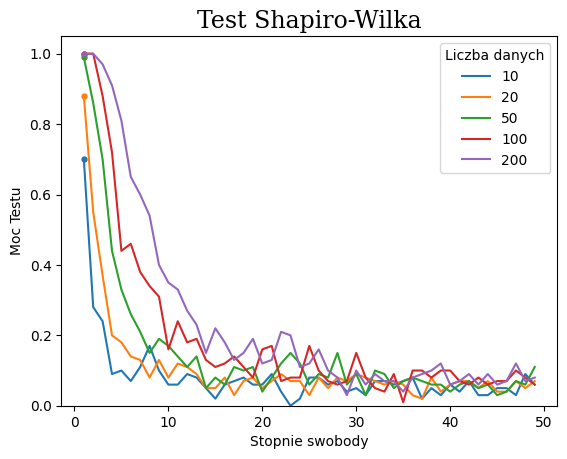

In [ ]:
# Symulacja
moc_shapiro = obliczanie_mocy_testu("shapiro")

# Tworzę podstawkę do wykresu 
wykres_shapiro = plt.figure()


# Dodaje dane do wykresu 
for i,moc in enumerate(moc_shapiro):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    # Dodaję punkt dla pierwszego elementu
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 


# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Shapiro-Wilka",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(0)
plt.show()

### Wnioski
Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do wartości 0.05(co jest równe poziomowi istotności ustalonemu dla tego tesu). Z wykresu widzimy, że moc testu słabnie hiperbolicznie, dla stopnii swobody > 30, możemy zauważyć, że liczba danych przestaje mieć znaczenie, a dla stopni swobody > 45, liczba danych nie ma już żadnego znaczenia dla mocy testu. Test wydaje się być miarodajny i wiarygodny, ze względu na to, że wraz ze wzrostem stopni swobody w rozkładzie t-studenta możemy estymować go rozkładem normalnym. Umowna wartość od której możemy go estymować to n > 30, co zgadzałoby się z wykresem i wcześniejszym rozumowaniem



### Test Kołgomorowa

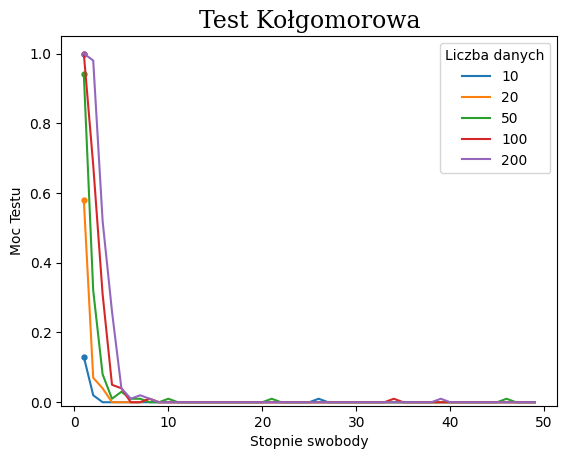

In [ ]:
# Symulacja
moc_kolgom = obliczanie_mocy_testu("kol")

# Tworzę wykres

wykres_kolgo = plt.figure()

# Dodaje dane do wykres
for i,moc in enumerate(moc_kolgom):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 



# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Kołgomorowa",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(-0.01)
plt.show()

### Wnioski

Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do 0. Z wykresu widzimy, że moc testu maleje bardzo szybko i już dla 10 stopni swobody jest bliski 0. Wydaje się, że test jest miarodajny i w miarę wiarygodny tylko dla:
- dużej liczby stopni swobody(powyżej 100)
- małej liczby stopni swobody, ale dużej liczbie danych(powyżej 50)

Wynika to z faktu, że Test Kołgomorowa, jest bardziej ogólny niż test Shapiro-Wilka.

### Test chi-kwadrat

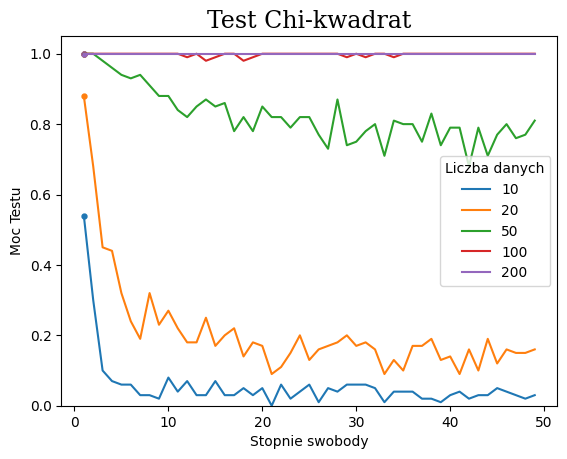

In [ ]:
# Symulacja
moc_chi = obliczanie_mocy_testu("chi")

# Tworzę wykres

wykres_chi = plt.figure()

# Dodaje dane do wykresu
for i,moc in enumerate(moc_chi):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Chi-kwadrat",fontdict=font_title)
plt.legend(title="Liczba danych",loc="center right")
plt.ylim(0,)
plt.show()

#### Wnioski

Z wykresu możemy zobaczyć, że od pewnej wielkości liczby danych(>= 100) test ignoruje wartość stopni swobody i przyjmuje wartość 1, co czyni go nie wiarygodnym dla dużej liczby danych, bo wiemy, że moc testu powinna maleć. Sytuacja zaczyna się poprawiać dla liczby danych <= 50, bo test zaczyna powoli ale maleć. Ogólnie możemy powiedzieć, że czym mniejsza liczba danych tym ten test jest bardziej miarodajny i wiarygodny, co nie oznacza, że jest to dobry poziom wiarygodności. Wynika to z faktu, że jest to najogólnijeszy test w całym zestawieniu.

## Porównanie 
Wyliczę średnią moc każdego z testów dla każdego stopnia swobody, co pomoże pokazać mi różnice.


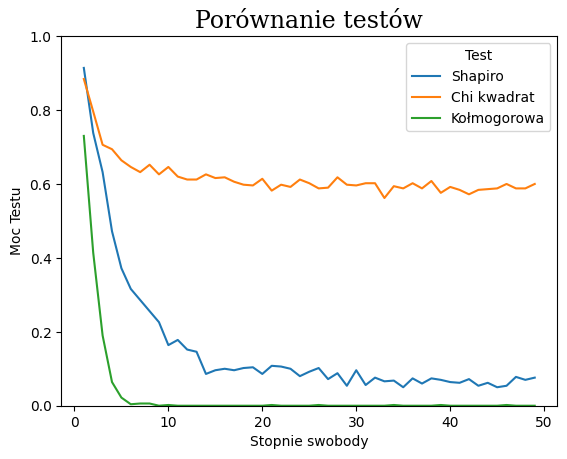

In [ ]:
# Tworzenie tablic w których będę trzymał średnie 
srednia_moc_shapiro = np.zeros(len(stopnie_swobody))
srednia_moc_chi = np.zeros(len(stopnie_swobody))
srednia_moc_kol = np.zeros(len(stopnie_swobody))

# Sumowanie mocy 
for i in range(len(moc_shapiro)):
    srednia_moc_shapiro += moc_shapiro[i]
    srednia_moc_chi += moc_chi[i]
    srednia_moc_kol += moc_kolgom[i]

# Wyliczanie średnia 
srednia_moc_shapiro /= len(moc_shapiro)
srednia_moc_chi /= len(moc_chi)
srednia_moc_kol /= len(moc_kolgom)

# Tworzenie wykresu 
w = plt.figure()
plt.plot(stopnie_swobody,srednia_moc_shapiro,label="Shapiro")
plt.plot(stopnie_swobody,srednia_moc_chi,label = "Chi kwadrat")
plt.plot(stopnie_swobody,srednia_moc_kol,label="Kołmogorowa")
plt.ylim(0,1)
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Porównanie testów",fontdict=font_title)
plt.legend(title="Test")
plt.ylim(0,)
plt.show()

### Wnioski
Jak widzimy na wykresie test Shapiro-Wilka jest najbardziej monotonicznym testem w tym zestawie. Natomiast test Kołmogorowa idzie w jedną skrajność, jaką jest bardzo szybki spadek i dążenie do 0. Test Chi kwadrat popada w drugą skrajność jaka jest bardzo wolny spadek, a wręcz asymptotyczne dążenie do niewyjaśnialnej wartości odbiegającej od 0.